In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dp = os.path.join("..","data", "processed","data_scaled.csv")
df_scaled = pd.read_csv(dp)

dp = os.path.join("..","data", "processed","data_clean.csv")
df = pd.read_csv(dp)


k = 2, Silhouette Score = 0.612
k = 3, Silhouette Score = 0.567
k = 4, Silhouette Score = 0.525
k = 5, Silhouette Score = 0.508
k = 6, Silhouette Score = 0.477
k = 7, Silhouette Score = 0.467
k = 8, Silhouette Score = 0.431
k = 9, Silhouette Score = 0.413
k = 10, Silhouette Score = 0.386


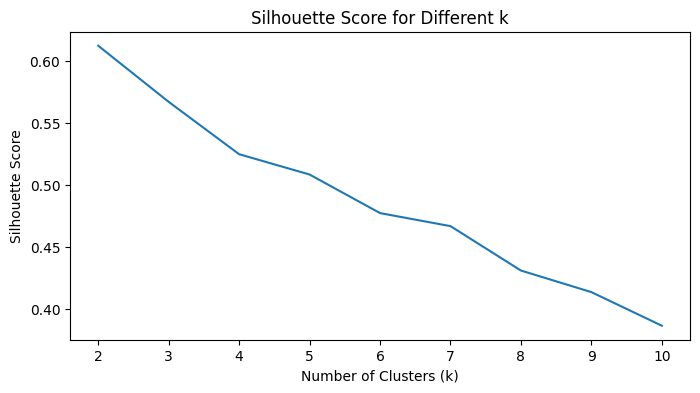

In [5]:
numeric = df_scaled.select_dtypes(include='number').columns
exclude = ['Addiction Level', 'Total Time Spent', 'Number of Videos Watched']
features = [col for col in numeric if col not in exclude]
# Error bc some points cannot be converted to float.
#X = df_scaled[['Age', 'Income','Total Time Spent','Time per Session','Engagement Efficiency','Videos per Session','Video Consumption Ratio']]
X = df_scaled[features].astype(float)

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.3f}")
    
plt.figure(figsize=(8, 4))
plt.plot(list(K_range), silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.show()

In [6]:
best_k = 3

kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

df_scaled['Cluster'] = cluster_labels

sscore= silhouette_score(X, cluster_labels)
print (sscore)


print("Cluster counts: ")
print(df_scaled['Cluster'].value_counts())

0.5668931211951174
Cluster counts: 
Cluster
1    355
2    333
0    312
Name: count, dtype: int64


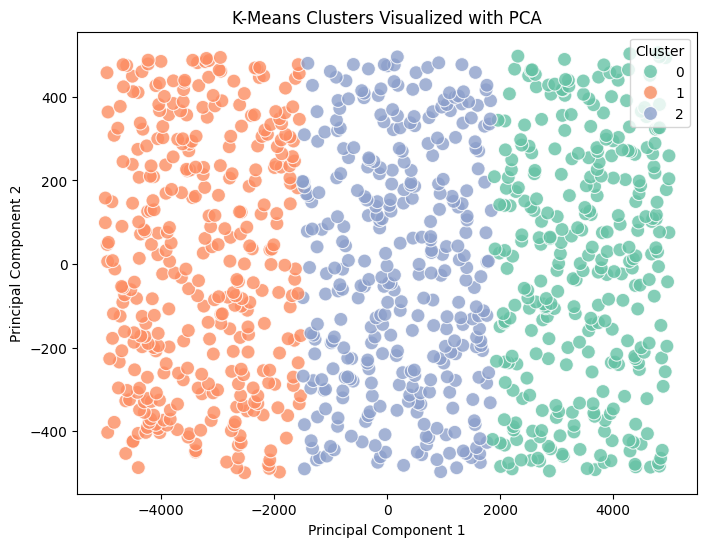

In [7]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="Set2", s=100, alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters Visualized with PCA")
plt.legend(title="Cluster")
plt.show()


0.19907708252334116


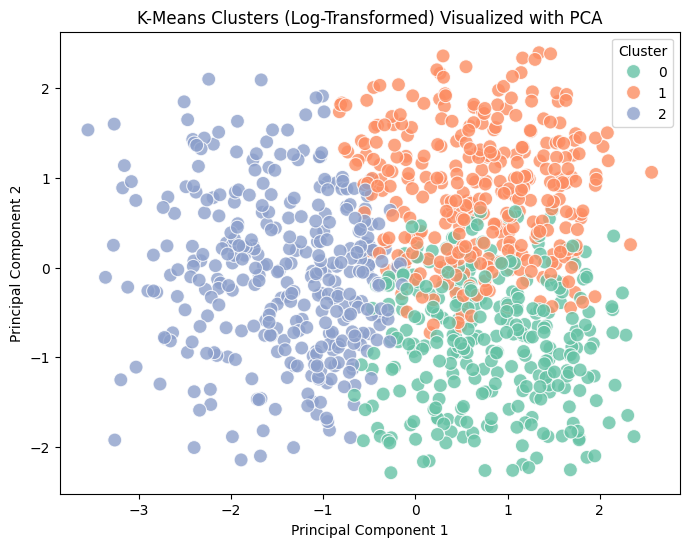

C:\Users\Fueng\AppData\Local\Temp\ipykernel_37032\2739872639.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], [], c=scatter.cmap(i / (k - 1)), label=label)


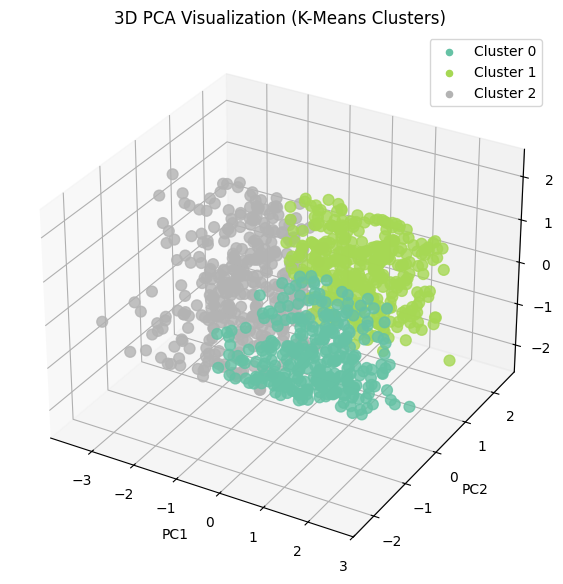

DBSCAN clusters:  1


C:\Users\Fueng\AppData\Local\Temp\ipykernel_37032\2739872639.py:77: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=sns.color_palette('Set2', len(cluster_labels))[cluster_label],


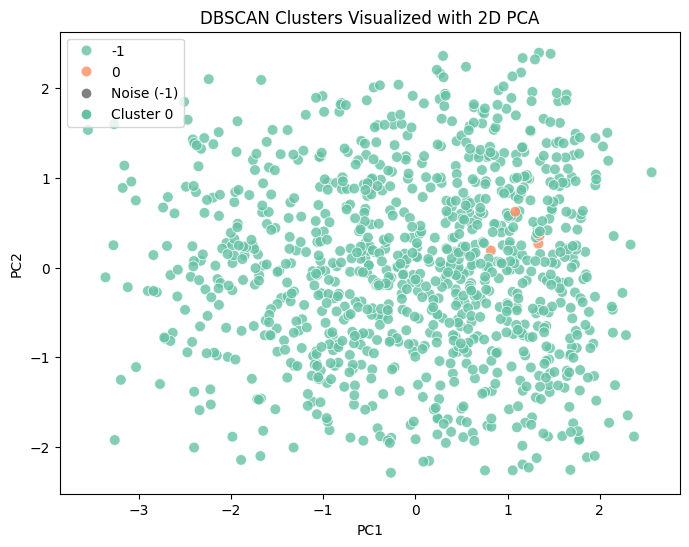

Not enough clusters (excluding noise) to compute silhouette score.


In [8]:
X = df_scaled[['Age', 'Income','Total Time Spent','Time per Session_log','Engagement Efficiency_log','Videos per Session_log','Video Consumption Ratio_log']]
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)
df_scaled['Cluster_Log'] = clusters

sscore= silhouette_score(X, clusters)
print (sscore)

# 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2", s=100, alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters (Log-Transformed) Visualized with PCA")
plt.legend(title="Cluster")
plt.show()

# 3D
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X)

pc1 = X_pca_3d[:, 0]
pc2 = X_pca_3d[:, 1]
pc3 = X_pca_3d[:, 2]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pc1, pc2, pc3, c=clusters, cmap='Set2', s=60, alpha=0.8)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("3D PCA Visualization (K-Means Clusters)")

legend_labels = [f"Cluster {i}" for i in range(k)]
for i, label in enumerate(legend_labels):
    ax.scatter([], [], [], c=scatter.cmap(i / (k - 1)), label=label)
ax.legend(loc='best')

plt.show()

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

df_scaled['DB_Cluster'] = labels

unique_label = set(labels)
n = len(unique_label) - (1 if -1 in labels else 0)
print('DBSCAN clusters: ', n)

pca_dbscan = PCA(n_components=2, random_state=42)
X_dbscan_pca = pca_dbscan.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_dbscan_pca[:, 0],
    y=X_dbscan_pca[:, 1],
    hue=labels,
    palette='Set2',
    s=60,
    alpha=0.8
)
plt.title("DBSCAN Clusters Visualized with 2D PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

cluster_labels = sorted(unique_label)
for cluster_label in cluster_labels:
    if cluster_label == -1:
        plt.scatter([], [], c='gray', label="Noise (-1)")
    else:
        plt.scatter([], [], c=sns.color_palette('Set2', len(cluster_labels))[cluster_label], 
                    label=f"Cluster {cluster_label}")
plt.legend(loc='best')
plt.show()

mask = labels != -1
if len(set(labels[mask])) > 1:  # Need at least 2 clusters to compute silhouette
    sil_score = silhouette_score(X[mask], labels[mask])
    print(f"Silhouette Score (excluding noise): {sil_score:.3f}")
else:
    print("Not enough clusters (excluding noise) to compute silhouette score.")

In [9]:
features = [
    'Age', 'Income', 'Total Time Spent',
    'Time per Session', 'Engagement Efficiency',
    'Videos per Session', 'Video Consumption Ratio',
    'Time per Session_log', 'Engagement Efficiency_log',
    'Videos per Session_log', 'Video Consumption Ratio_log'
]
cluster_means = df_scaled.groupby('Cluster_Log')[features].mean()
print(cluster_means)
# Remember its standardized

                  Age    Income  Total Time Spent  Time per Session  \
Cluster_Log                                                           
0           -0.958388  0.272969          0.573986          0.283249   
1            0.832862 -0.212472          0.587468          0.241031   
2           -0.008361 -0.022648         -1.093790         -0.490326   

             Engagement Efficiency  Videos per Session  \
Cluster_Log                                              
0                        -0.374011            0.060631   
1                        -0.375180            0.066615   
2                         0.705013           -0.120151   

             Video Consumption Ratio  Time per Session_log  \
Cluster_Log                                                  
0                          -0.400123              0.008411   
1                          -0.376948             -0.012603   
2                           0.729527             -0.747989   

             Engagement Efficiency_log  Vi

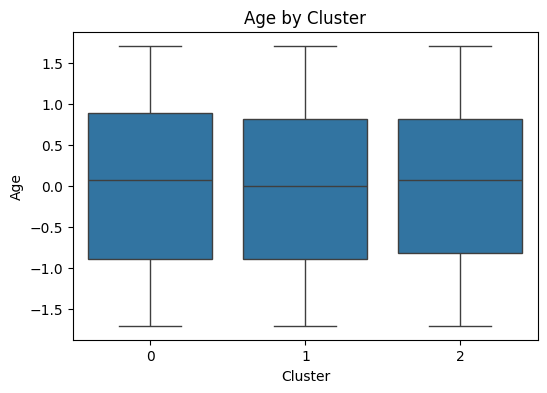

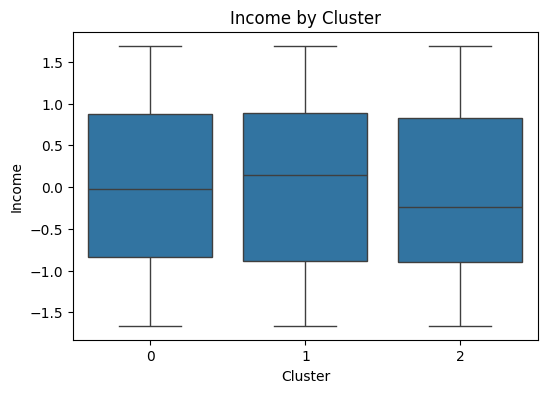

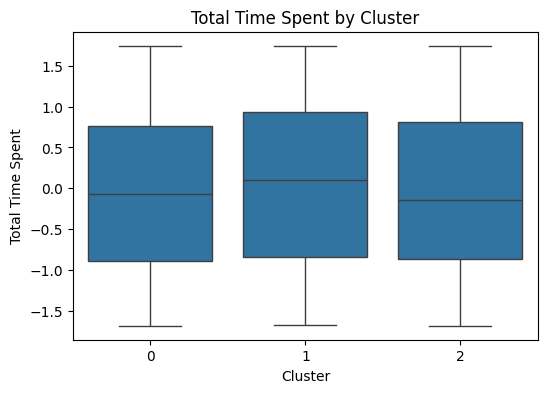

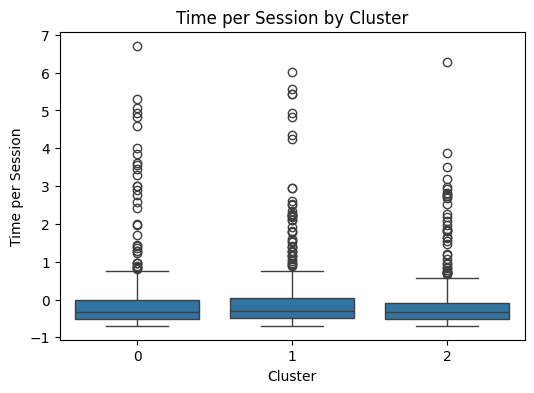

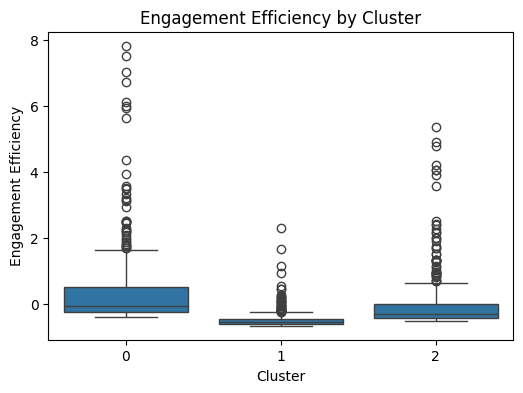

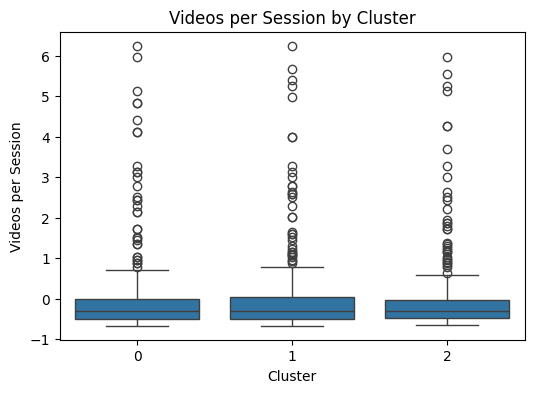

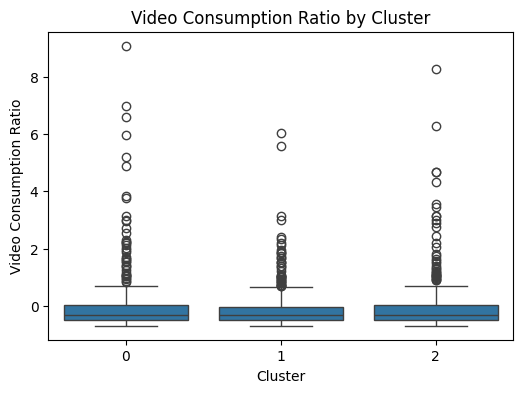

In [10]:

features_to_plot = [
    'Age', 'Income', 'Total Time Spent', 
    'Time per Session', 'Engagement Efficiency', 
    'Videos per Session', 'Video Consumption Ratio'
]

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=feature, data=df_scaled)
    plt.title(f'{feature} by Cluster')
    plt.show()


0.5442884343381615


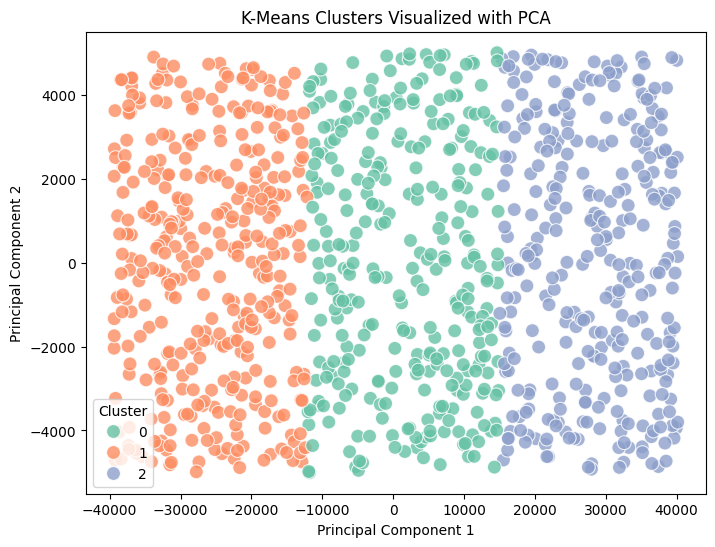

In [12]:
# Just curious about what the non-standardized dataset would show up with
numeric = df.select_dtypes(include='number').columns
exclude = ['Addiction Level', 'Total Time Spent', 'Number of Videos Watched']
features = [col for col in numeric if col not in exclude]
# Error bc some points cannot be converted to float.
X = df[features].astype(float)
#X = df[['Age', 'Income','Total Time Spent','Time per Session','Engagement Efficiency','Videos per Session','Video Consumption Ratio']]
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster_Log'] = clusters

sscore= silhouette_score(X, clusters)
print (sscore)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2", s=100, alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters Visualized with PCA")
plt.legend(title="Cluster")
plt.show()